<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/2022/01.%ED%8E%AD%EA%B7%84%20%EB%AA%B8%EB%AC%B4%EA%B2%8C%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%8E%AD%EA%B7%84_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [DACON] 펭귄 몸무게 예측 경진대회
+ https://dacon.io/competitions/official/235862/overview/description


|컬럼|설명|
|--|-----------|
|id|샘플 아이디|   
|Species|펭귄의 종을 나타내는 문자열|
|Island|샘플들이 수집된 Palmer Station 근처 섬 이름| 
|Clutch Completion|관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기|
|Culmen Length (mm)|펭귄 옆모습 기준 부리의 가로 길이|    
|Culmen Depth (mm)|펭귄 옆모습 기준 부리의 세로 길이|    
|Flipper Length (mm)|펭귄의 팔(날개) 길이|
|Sex|펭귄의 성별|
|Delta 15 N (o/oo)|토양에 따라 변화하는 안정 동위원소 15N:14N의 비율|
|Delta 13 C (o/oo)|먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율|   |Body Mass (g)|펭귄의 몸무게를 나타내는 숫자 (g)|

### 차례
#### 0. 패키지 설치

#### 1. 데이터 파악    
    1) 기초 통계 파악    
    2) 결측치 보간을 위한 EDA & 기초 통계 
    3) 결측치 보간

#### 2. EDA
    1) 수치형 변수 EDA
    2) 범주형 변수 EDA
    3) 변수 간 상관관계

#### 3. 모델링
    1) 인코딩
    2) 스케일링
    3) 모델 훈련
    4) 모델 평가
    


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0.패키지 설치

In [2]:
#데이터 파악
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#모델링 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.decomposition import PCA

#모델 훈련 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

### 1.데이터 파악


In [3]:
train = pd.read_csv('/content/drive/MyDrive/2022/202201 펭귄 몸무게 예측 경진대회/데이터/train.csv')
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [4]:
test = pd.read_csv('/content/drive/MyDrive/2022/202201 펭귄 몸무게 예측 경진대회/데이터/test.csv')
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [5]:
#데이터 확인 & 결측값 확인 & 범주형 변수 값 보기

def data_info (data):
  print('데이터 타입 확인\n',data.dtypes)
  print('\n결측값 확인\n',data.isnull().sum())
  print('\n범주형 변수')
  for i in data.columns:
    if data[i].dtypes == 'object' :
      print('\n',i,'\n',data[i].unique())

  return 

In [6]:
data_info(train)
data_info(test)

데이터 타입 확인
 id                       int64
Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

결측값 확인
 id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

범주형 변수

 Species 
 ['Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Adelie Penguin (Pygoscelis adeliae)']

 Island 
 ['Biscoe' 'Dream' 'Torgersen']

 Clutch Completion 
 ['Yes' 'No']

 Sex 
 ['MALE' 'FEMALE' nan]
데이터 타입 확인
 id                       int64
Species                 object
Island         

+ 결측값 확인    
    1) 성별과 Delta 15 N (o/oo), Delta 13 C (o/oo)에 결측값이 3개씩 존재    
      -> 결측값을 보간하기 위해 데이터의 특징 파악 필요

+ 타깃 값은 Body Mass (g) 이므로 타깃 값과 관련된 사항으로 결측값을 보간한다

+ 성별 : 부리의 길이와 깊이와 관련 (http://scienceon.hani.co.kr/415317)
+ Delta 15 N (o/oo) & Delta 13 C (o/oo) : Island와 관련

#### 1) 기초 통계 파악

In [7]:
train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [8]:
test.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,228.00000,228.000000,228.000000,228.000000,219.000000,220.000000
mean,113.50000,43.576316,17.219298,199.846491,8.731226,-25.667745
std,65.96211,5.506157,1.992027,13.663938,0.544827,0.759964
min,0.00000,32.100000,13.100000,172.000000,7.685280,-26.864850
25%,56.75000,38.900000,15.700000,189.750000,8.325385,-26.236812
50%,113.50000,43.250000,17.500000,196.000000,8.675380,-25.806100
75%,170.25000,48.100000,18.700000,212.000000,9.109330,-25.115125
max,227.00000,59.600000,21.500000,230.000000,10.023720,-23.787670


#### 2) 결측치 보간을 위한 EDA & 기초 통계


##### (1) EDA

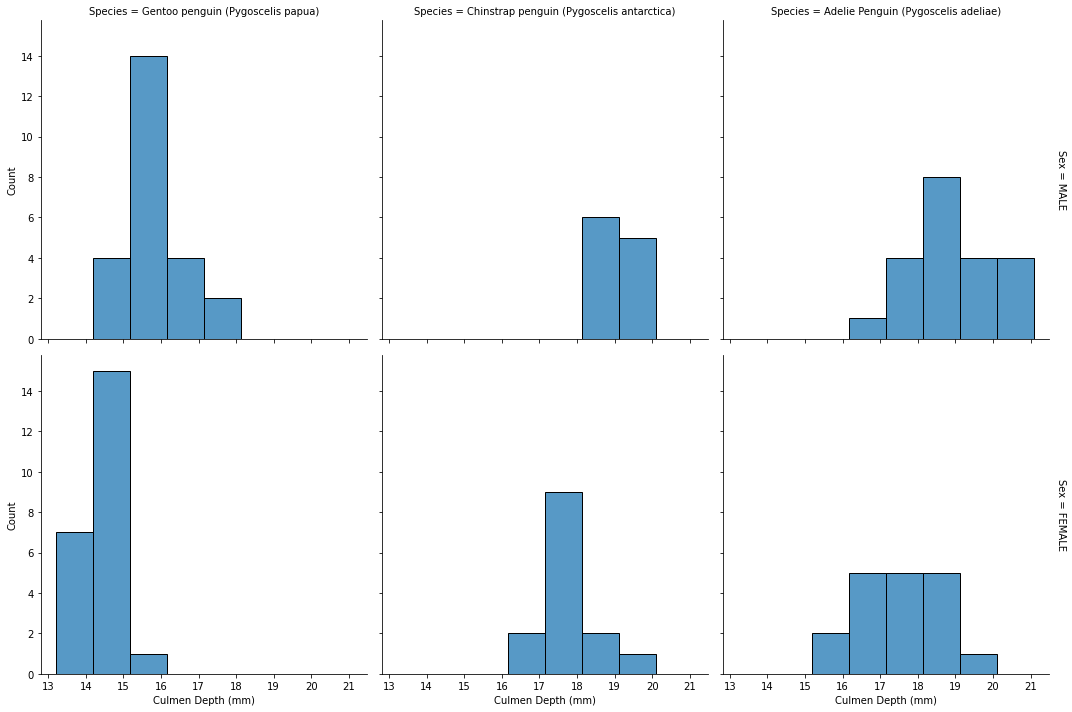

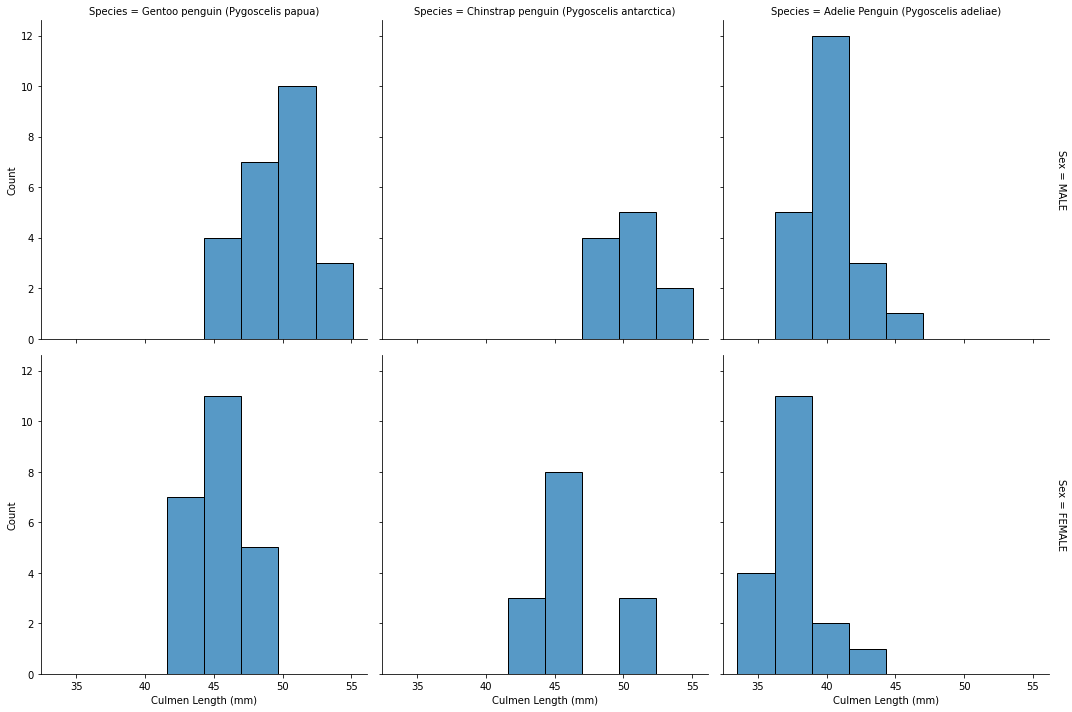

In [9]:
# 성별 EDA : 부리의 길이,부리의 깊이와 관련
# 부리의 깊이
sns.displot(train, x='Culmen Depth (mm)', col="Species", row="Sex",facet_kws=dict(margin_titles=True))

#부리의 길이
sns.displot(train, x='Culmen Length (mm)', col="Species", row="Sex",facet_kws=dict(margin_titles=True))

+ 성별에 따른 부리의 깊이, 부리의 길이의 차이가 존재    
+ 종 차이에 따른 부리의 깊이, 부리의 길이 차이가 존재

    -> 종과 부리의 길이를 고려해 성별 결측값 보간    
    -> 부리의 깊이의 상관은 낮다

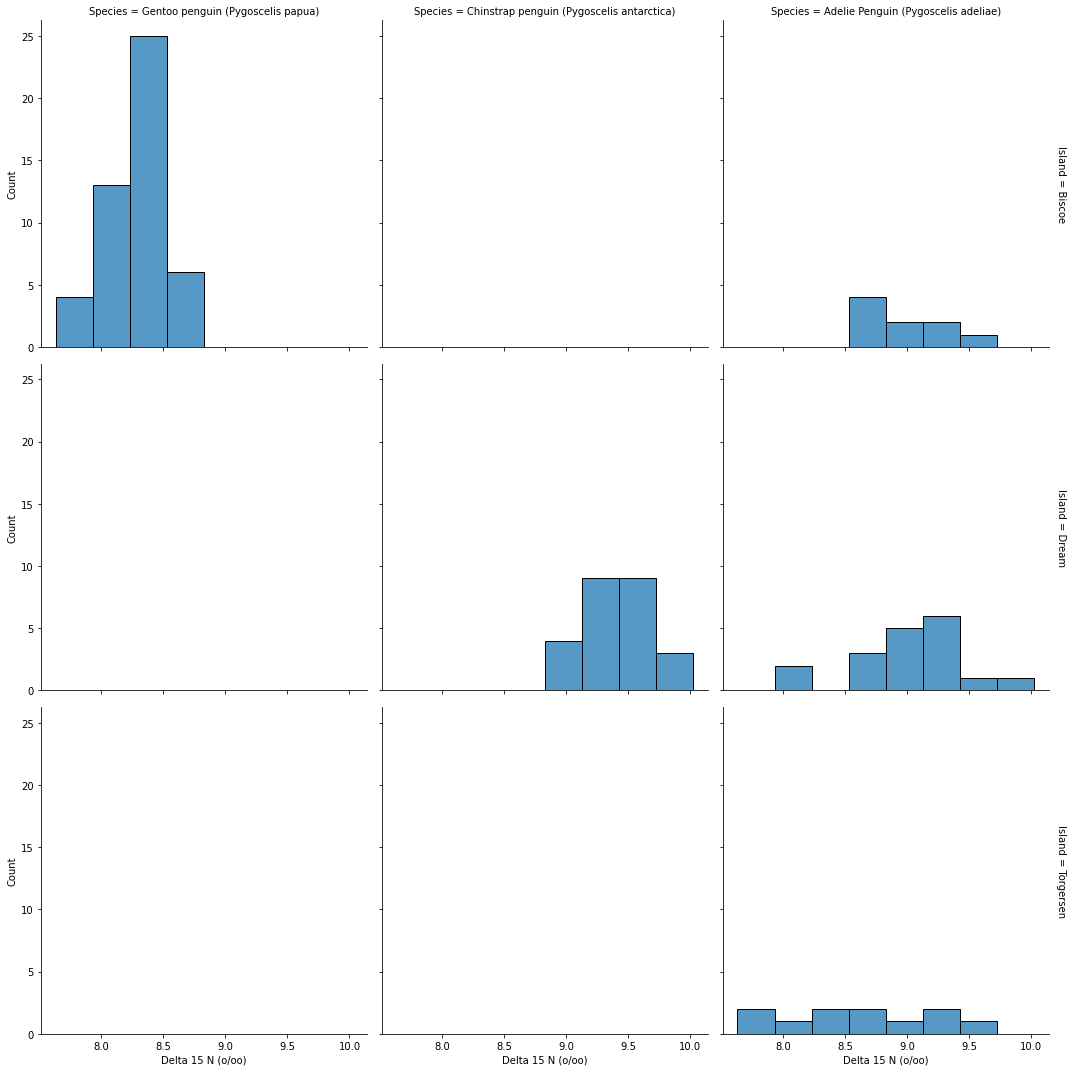

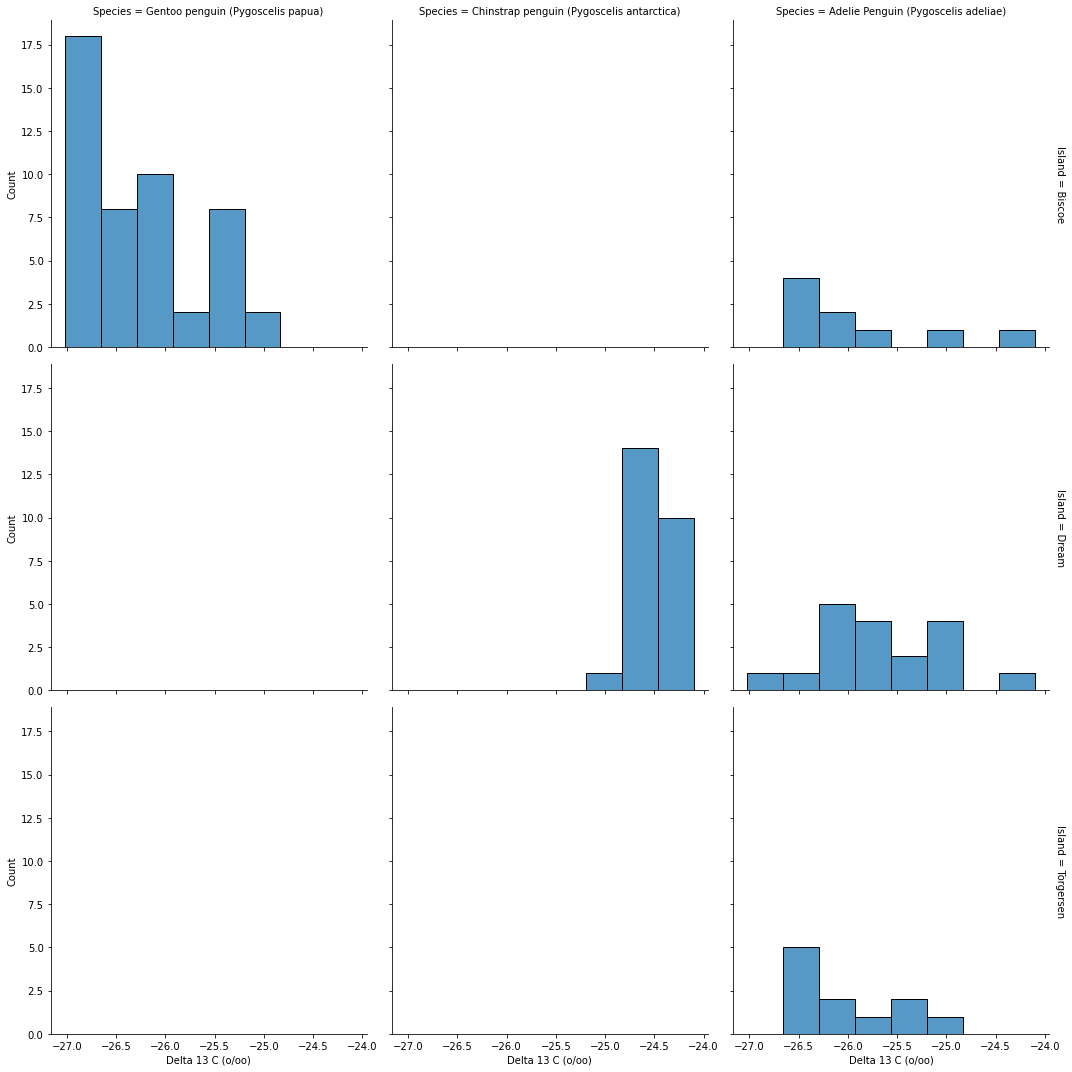

In [10]:
# Delta 15 N (o/oo) & Delta 13 C (o/oo) EDA : Island와 관련
sns.displot(train, x='Delta 15 N (o/oo)', col="Species", row="Island",facet_kws=dict(margin_titles=True))

sns.displot(train, x='Delta 13 C (o/oo)', col="Species", row="Island",facet_kws=dict(margin_titles=True))

+ 섬에 따른 토양의 차이 존재    
    ->  섬에 따라 토양 결측값 보간

##### (2) 기초 통계

In [11]:
group_S = train.groupby(['Species','Sex']).mean()
group_S

id  ...  Body Mass (g)
Species                                   Sex                ...               
Adelie Penguin (Pygoscelis adeliae)       FEMALE  56.666667  ...    3448.611111
                                          MALE    52.476190  ...    4097.619048
Chinstrap penguin (Pygoscelis antarctica) FEMALE  62.071429  ...    3550.000000
                                          MALE    48.545455  ...    4018.181818
Gentoo penguin (Pygoscelis papua)         FEMALE  55.826087  ...    4707.608696
                                          MALE    64.500000  ...    5445.833333

[6 rows x 7 columns]

In [12]:
group_I = train.groupby(['Island']).mean()
group_I

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Island,,,,,,,
Biscoe,58.631579,46.184211,15.614035,213.842105,8.383148,-26.213324,4878.947368
Dream,55.772727,44.297727,18.379545,192.636364,9.237308,-24.997817,3764.772727
Torgersen,49.615385,38.792308,18.538462,191.000000,8.621243,-26.017551,3817.307692


#### 3) 결측치 보간

In [13]:
#성별 변수 보간
for i in ['MALE','FEMAIL','FEMAIL']:
  train['Sex'] = train['Sex'].fillna(i)

In [14]:
#토양 변수 보간
null_df = train[train['Delta 15 N (o/oo)'].isnull()]
for i in null_df['Island']:
  train['Delta 15 N (o/oo)'] = train['Delta 15 N (o/oo)'].fillna(group_I['Delta 15 N (o/oo)'][i])

null_df = train[train['Delta 13 C (o/oo)'].isnull()]
for i in null_df['Island']:
  train['Delta 13 C (o/oo)'] = train['Delta 13 C (o/oo)'].fillna(group_I['Delta 13 C (o/oo)'][i])

In [15]:
train.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Body Mass (g)          0
dtype: int64

In [16]:
#성별 변수 보간
for i in ['FEMALE','FEMAIL','MAIL','FEMAIL','FEMAIL','FEMAIL']:
  test['Sex'] = test['Sex'].fillna(i)

In [17]:
#토양 변수 보간
null_df = test[test['Delta 15 N (o/oo)'].isnull()]
for i in null_df['Island']:
  test['Delta 15 N (o/oo)'] = test['Delta 15 N (o/oo)'].fillna(group_I['Delta 15 N (o/oo)'][i])

null_df = test[test['Delta 13 C (o/oo)'].isnull()]
for i in null_df['Island']:
  test['Delta 13 C (o/oo)'] = test['Delta 13 C (o/oo)'].fillna(group_I['Delta 13 C (o/oo)'][i])

In [18]:
test.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

### 2.EDA

#### 1) 수치형 변수 EDA

In [19]:
def EDA_int (data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes != 'object':

      #히스토그램
      sns.distplot(data,x = data[i],bins=10)
      plt.title(i)
      plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


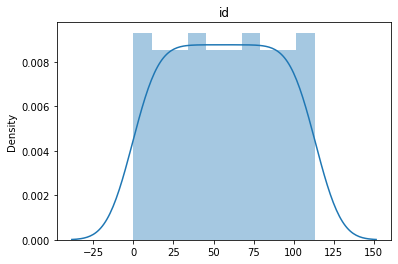

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


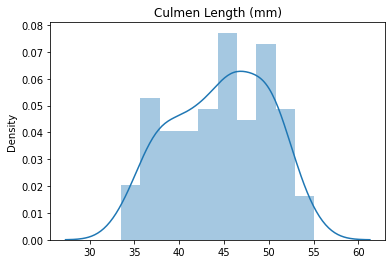

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


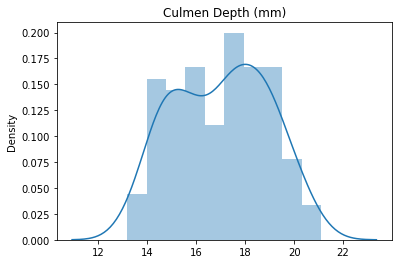

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


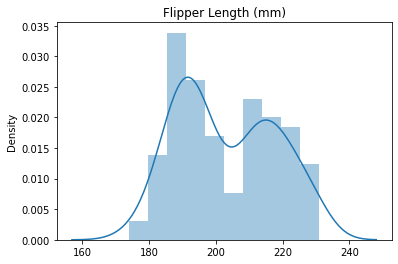

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


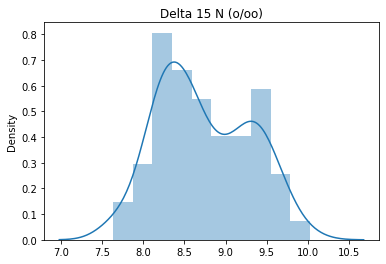

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


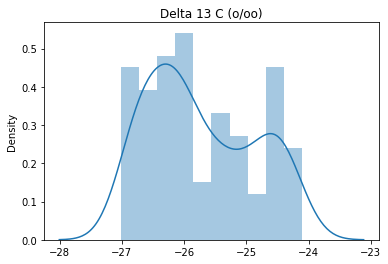

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


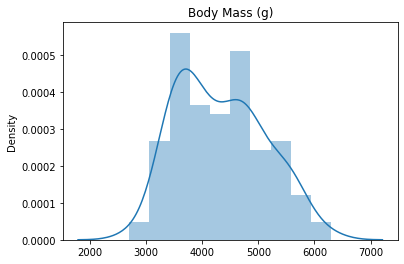

In [20]:
EDA_int(train)

#### 2) 범주형 변수 EDA

In [21]:
def EDA_obj (data):
  colors = sns.color_palette("Blues")
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      sns.barplot(x =i,y = 'Body Mass (g)',data = group_data ,palette='Blues')
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)
      plt.show()

      plt.pie(group_data['Body Mass (g)']/100, labels=group_data[i], autopct='%.1f%%', colors = colors)
      plt.title('%s pie plot'%i)
      plt.show()

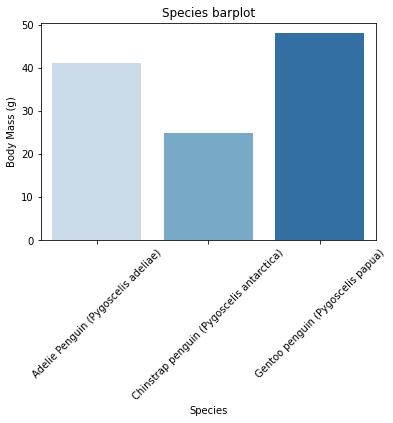

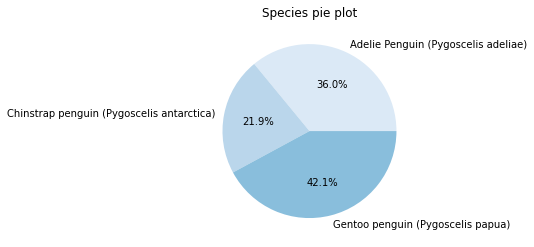

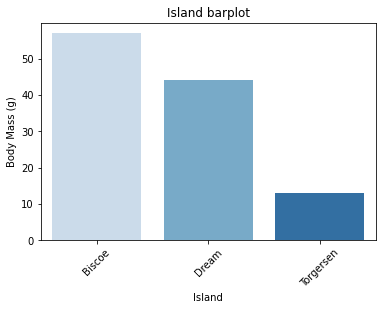

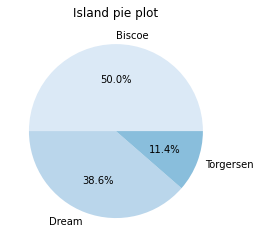

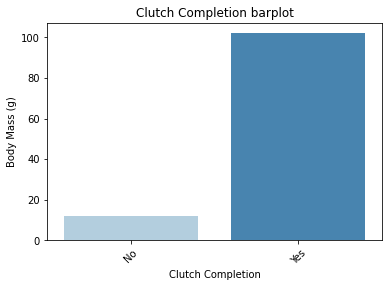

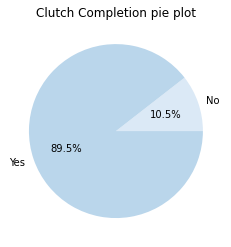

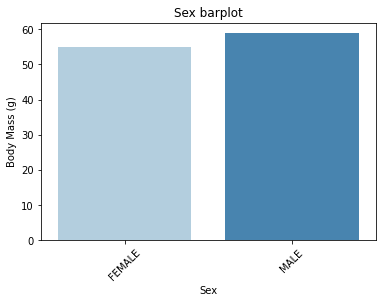

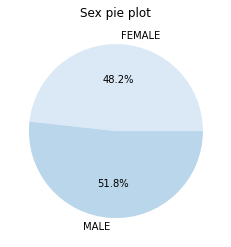

In [22]:
EDA_obj(train)

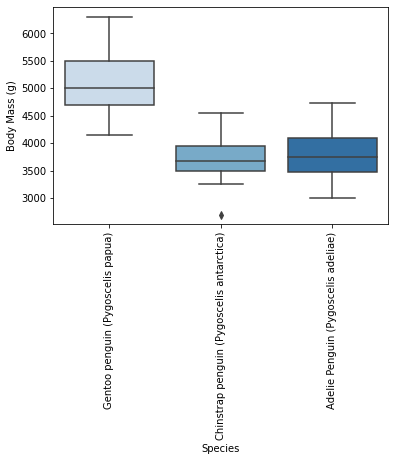

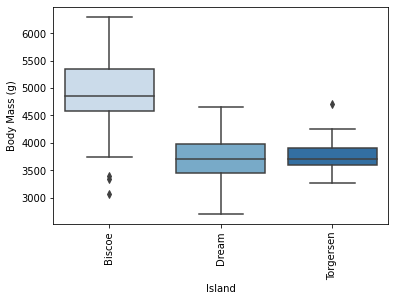

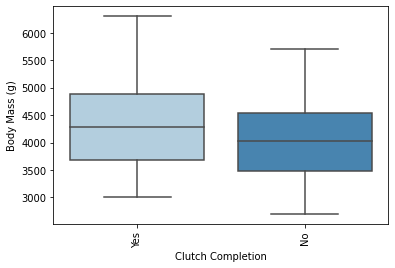

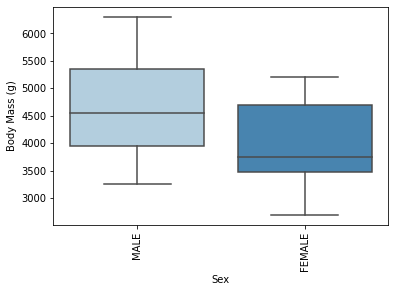

In [23]:
for i in train.columns:
  if train[i].dtypes == 'object':
    sns.boxplot(x = i ,y='Body Mass (g)',data=train, palette='Blues')
    plt.xticks(rotation=90)
    plt.show()

#### 3) 변수 간 상관관계

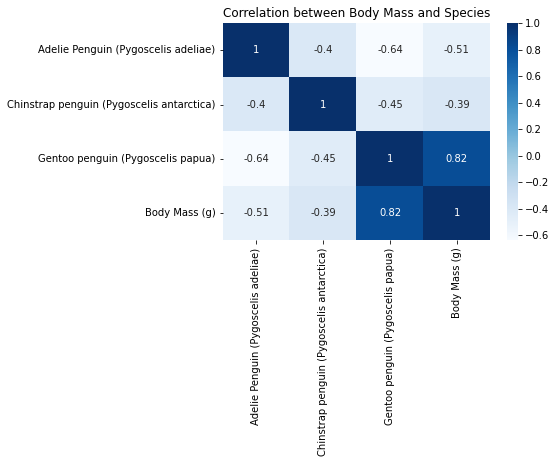

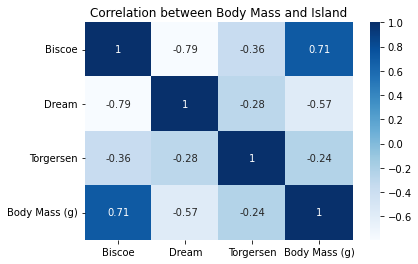

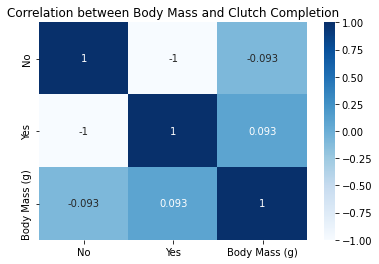

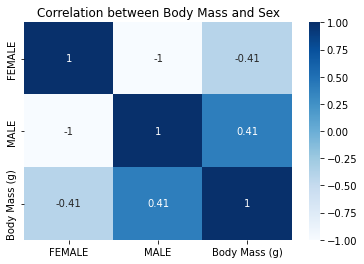

In [24]:
# 범주형 변수의 상관관계
for i in train.columns:
  if train[i].dtypes == 'object':
    Sp = pd.get_dummies(train[i])
    Sp['Body Mass (g)'] = train['Body Mass (g)'] 
    sns.heatmap(Sp.corr(),cmap='Blues',annot=True)
    plt.title('Correlation between Body Mass and %s'%i)
    plt.show()

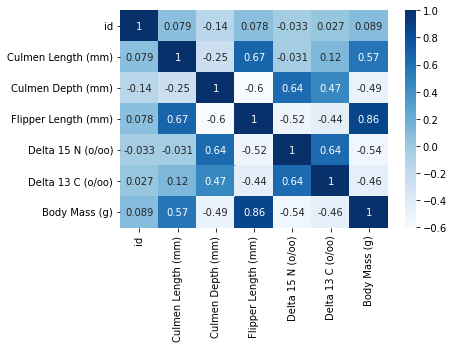

In [25]:
#수치형 변수 상관관계
sns.heatmap(train.corr(),cmap='Blues',annot=True)

범주형 변수와 Body Mass (g)
+ Species : 젠투 펭귄과 상관관계 존재
+ Island : Biscoe 섬과 상관관계 존재
+ Clutch Completion : 상관관계 존재하지 않음
+ Sex : 상관관계 존재하지 않음


수치형 변수와 Body Mass (g)
+ Flipper Length 상관관계 존재
+ Culmen Length 상관관계 존재

### 3.모델링

In [26]:
train = train.drop(['id'],axis=1)
test = test.drop(['id'],axis=1)

#### 1) 인코딩

In [27]:
#원핫 인코딩
#Encoder_OH = OneHotEncoder(sparse=False)
#X_OH = Encoder_OH.fit_transform(train)

X_OH = pd.get_dummies(pd.DataFrame(train))
test_OH = pd.get_dummies(test)

In [28]:
#라벨 인코딩
Encoder_Lb = LabelEncoder()
X_Lb = train.values
X_Lb[:,0] = Encoder_Lb.fit_transform(X_Lb[:,0])
X_Lb[:,1] = Encoder_Lb.fit_transform(X_Lb[:,1])
X_Lb[:,2] = Encoder_Lb.fit_transform(X_Lb[:,2])
X_Lb[:,6] = Encoder_Lb.fit_transform(X_Lb[:,6])

test_Lb = test.values
test_Lb[:,0] = Encoder_Lb.fit_transform(test_Lb[:,0])
test_Lb[:,1] = Encoder_Lb.fit_transform(test_Lb[:,1])
test_Lb[:,2] = Encoder_Lb.fit_transform(test_Lb[:,2])
test_Lb[:,6] = Encoder_Lb.fit_transform(test_Lb[:,6])

#### 2) 세트 분할

In [29]:
X_OH_data = X_OH.drop(['Body Mass (g)'],axis=1)
X_OH_data = X_OH_data.values
y_OH = X_OH['Body Mass (g)']

X_Lb_data = X_Lb[:,:-1]
y_Lb = X_Lb[:,-1]

In [30]:
X_train_OH,X_test_OH,y_train_OH,y_test_OH = train_test_split(X_OH_data,y_OH,test_size=0.1)
X_train_Lb,X_test_Lb,y_train_Lb,y_test_Lb = train_test_split(X_Lb_data,y_Lb,test_size=0.1)

#### 3) 스케일링

In [31]:
#표준화 변환
Scaler_St = StandardScaler()

#정규화 변환
Scaler_Mm = MinMaxScaler()

#### 4) 모델 훈련 & 평가

In [32]:
lin_reg = LinearRegression()
rid_reg = Ridge()
las_reg = Lasso()
ela_reg = ElasticNet()
det_reg = DecisionTreeRegressor()

##### (1) 원핫 인코딩 - 스케일링 - 모델링

선형 회귀
+ 변수가 타겟에 미치는 영향을 선형적으로 파악
+ 범주형 변수를 원핫인코딩 or 더미 처리 (라벨인코딩은 1,2 등의 숫자로 나타내는 과정에서 선형관계를 만들어내서 추천하지 않음)

In [33]:
#표준화 - 선형회귀
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

lin_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = lin_reg.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test_OH,y_test_predict)
lin_rmse = np.sqrt(lin_mse)
print('valid RMSE : ',lin_rmse)

valid RMSE :  279.75722513761974


In [34]:
#정규화 - 선형회귀
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

lin_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = lin_reg.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test_OH,y_test_predict)
lin_rmse = np.sqrt(lin_mse)
print('valid RMSE : ',lin_rmse)

valid RMSE :  279.7572251376198


In [35]:
#표준화 - 릿지
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

rid_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = rid_reg.predict(X_test_scaled)
rid_mse = mean_squared_error(y_test_OH,y_test_predict)
rid_rmse = np.sqrt(rid_mse)
print('valid RMSE : ',rid_rmse)

valid RMSE :  280.44856761780454


In [36]:
#정규화 - 릿지
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

rid_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = rid_reg.predict(X_test_scaled)
rid_mse = mean_squared_error(y_test_OH,y_test_predict)
rid_rmse = np.sqrt(rid_mse)
print('valid RMSE : ',rid_rmse)

valid RMSE :  281.69414122879925


In [37]:
#표준화 - 라쏘
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

las_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = las_reg.predict(X_test_scaled)
las_mse = mean_squared_error(y_test_OH,y_test_predict)
las_rmse = np.sqrt(las_mse)
print('valid RMSE : ',las_rmse)

valid RMSE :  280.6384155943528


In [38]:
#정규화 - 라쏘
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

las_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = las_reg.predict(X_test_scaled)
las_mse = mean_squared_error(y_test_OH,y_test_predict)
las_rmse = np.sqrt(las_mse)
print('valid RMSE : ',las_rmse)

valid RMSE :  282.20422272619794


In [39]:
#표준화 - 엘라스틱넷
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

ela_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = ela_reg.predict(X_test_scaled)
ela_mse = mean_squared_error(y_test_OH,y_test_predict)
ela_rmse = np.sqrt(ela_mse)
print('valid RMSE : ',ela_rmse)

valid RMSE :  319.6878990486647


In [40]:
#정규화 - 엘라스틱넷
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

ela_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = ela_reg.predict(X_test_scaled)
ela_mse = mean_squared_error(y_test_OH,y_test_predict)
ela_rmse = np.sqrt(ela_mse)
print('valid RMSE : ',ela_rmse)

valid RMSE :  436.58306261332706


In [41]:
#표준화 - 결정트리회귀
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

det_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = det_reg.predict(X_test_scaled)
det_regmse = mean_squared_error(y_test_OH,y_test_predict)
det_regrmse = np.sqrt(det_regmse)
print('valid RMSE : ',det_regrmse)

valid RMSE :  333.93175450481897


In [42]:
#정규화 - 결정트리회귀
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

det_reg.fit(X_train_Scaled,y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = det_reg.predict(X_test_scaled)
det_regmse = mean_squared_error(y_test_OH,y_test_predict)
det_regrmse = np.sqrt(det_regmse)
print('valid RMSE : ',det_regrmse)

valid RMSE :  302.7650354097492


In [43]:
#표준화 - 그래디언트 부스팅 회귀
X_train_Scaled = Scaler_St.fit_transform(X_train_OH)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_Scaled, y_train_OH)
X_test_scaled = Scaler_St.transform(X_test_OH)
y_test_predict = gbrt.predict(X_test_scaled)
gbrtmse = mean_squared_error(y_test_OH,y_test_predict)
gbrtrmse = np.sqrt(gbrtmse)
print('valid RMSE : ',gbrtrmse)

valid RMSE :  302.78032745777824


In [44]:
#정규화 - 그래디언트 부스팅 회귀
X_train_Scaled = Scaler_Mm.fit_transform(X_train_OH)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_Scaled, y_train_OH)
X_test_scaled = Scaler_Mm.transform(X_test_OH)
y_test_predict = gbrt.predict(X_test_scaled)
gbrtmse = mean_squared_error(y_test_OH,y_test_predict)
gbrtrmse = np.sqrt(gbrtmse)
print('valid RMSE : ',gbrtrmse)

valid RMSE :  302.78032745777824


##### (2) 라벨 인코딩 - 스케일링 - 모델링

In [45]:
#표준화 - 결정트리회귀
X_train_Scaled = Scaler_St.fit_transform(X_train_Lb)

det_reg.fit(X_train_Scaled,y_train_Lb)
X_test_scaled = Scaler_St.transform(X_test_Lb)
y_test_predict = det_reg.predict(X_test_scaled)
det_regmse = mean_squared_error(y_test_Lb,y_test_predict)
det_regrmse = np.sqrt(det_regmse)
print('valid RMSE : ',det_regrmse)

valid RMSE :  559.4361000150062


In [46]:
#정규화 - 결정트리회귀
X_train_Scaled = Scaler_Mm.fit_transform(X_train_Lb)

det_reg.fit(X_train_Scaled,y_train_Lb)
X_test_scaled = Scaler_Mm.transform(X_test_Lb)
y_test_predict = det_reg.predict(X_test_scaled)
det_regmse = mean_squared_error(y_test_Lb,y_test_predict)
det_regrmse = np.sqrt(det_regmse)
print('valid RMSE : ',det_regrmse)

valid RMSE :  527.4249551673994


In [47]:
#표준화 - 그래디언트 부스팅 회귀
X_train_Scaled = Scaler_St.fit_transform(X_train_Lb)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_Scaled, y_train_Lb)
X_test_scaled = Scaler_St.transform(X_test_Lb)
y_test_predict = gbrt.predict(X_test_scaled)
gbrtmse = mean_squared_error(y_test_Lb,y_test_predict)
gbrtrmse = np.sqrt(gbrtmse)
print('valid RMSE : ',gbrtrmse)

valid RMSE :  375.78593398487294


In [48]:
#정규화 - 그래디언트 부스팅 회귀
X_train_Scaled = Scaler_Mm.fit_transform(X_train_Lb)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_Scaled, y_train_Lb)
X_test_scaled = Scaler_Mm.transform(X_test_Lb)
y_test_predict = gbrt.predict(X_test_scaled)
gbrtmse = mean_squared_error(y_test_Lb,y_test_predict)
gbrtrmse = np.sqrt(gbrtmse)
print('valid RMSE : ',gbrtrmse)

valid RMSE :  375.78593398487294


### 4.결론

+ 선형회귀,릿지,라쏘, 그래디언트부스팅회귀는 스케일링의 영향을 거의 받지 않는다
+ 엘라스틱 넷, 결정트리회귀는 스케일링의 영향을 많이 받는다

+ 인코딩에 영향을 받는 모델은 결정트리회귀, 그래디언트부스팅회귀이다

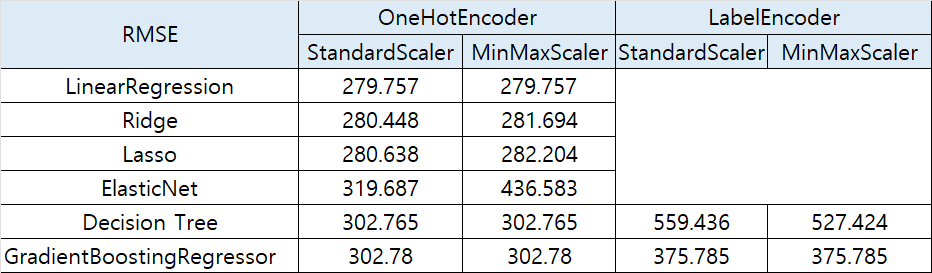